In [1]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist, pdist
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

dataset = pd.read_csv("fleet_data.csv")

# shape
print(dataset.shape)
    
# head
print(dataset.head(10))
    
#data type for each column
print(dataset.dtypes)
    
# descriptions
print(dataset.describe())

(4000, 3)
    Driver_ID  Distance_Feature  Speeding_Feature
0  3423311935             71.24              28.0
1  3423313212             52.53              25.0
2  3423313724             64.54              27.0
3  3423311373             55.69              22.0
4  3423310999             54.58              25.0
5  3423313857             41.91              10.0
6  3423312432             58.64              20.0
7  3423311434             52.02               8.0
8  3423311328             31.25              34.0
9  3423312488             44.31              19.0
Driver_ID             int64
Distance_Feature    float64
Speeding_Feature    float64
dtype: object
          Driver_ID  Distance_Feature  Speeding_Feature
count  4.000000e+03       4000.000000       4000.000000
mean   3.423312e+09         76.041523         10.721000
std    1.154845e+03         53.469563         13.708543
min    3.423310e+09         15.520000          0.000000
25%    3.423311e+09         45.247500          4.000000
50%   

In [2]:
# drop driver ID
dataset = dataset.drop(columns=['Driver_ID'])

In [3]:
# scale dataset
scaler = RobustScaler()
X = scaler.fit_transform(dataset)
X

array([[ 0.8785872 ,  4.4       ],
       [-0.03924454,  3.8       ],
       [ 0.54991415,  4.2       ],
       ...,
       [ 5.76796664,  1.2       ],
       [ 6.02452784, -0.2       ],
       [ 5.62668629,  0.6       ]])

Centroids
[[ 6.19699769  2.49077307]
 [-0.16056147  0.55634772]]


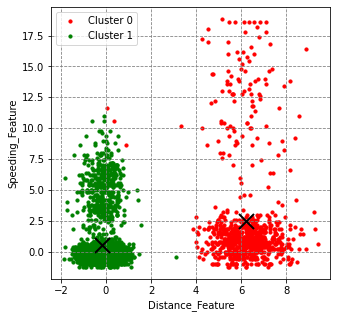

Centroids
[[-0.16253929 -0.1591925 ]
 [ 6.23521527  0.90589928]
 [-0.14397842  5.25821596]
 [ 6.0501022  12.84571429]]


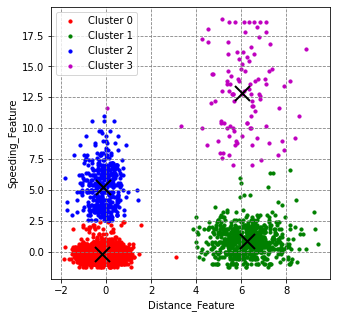

In [4]:
def runClustering(k):
    kmeans = KMeans(n_clusters=k).fit(X)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    print("Centroids")
    print(centroids)

    # figure size
    plt.figure(figsize=(5,5))
    # customize gridness
    plt.rc('grid', linestyle="--", color='gray')
    colors = ['r', 'g', 'b', 'm', 'c', 'y']
    for i in range(k):
        ind = [j for j in range(labels.size) if labels[j] == i]
        # plot the data observations
        # Colormaps reference: http://matplotlib.org/examples/color/colormaps_reference.html
        plt.scatter(X[ind,0], X[ind,1], c=colors[i], s=10, label='Cluster %d'%i)
        # plot the centroids
        lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
        # make the centroid x's bigger
        plt.setp(lines,ms=15.0)
        plt.setp(lines,mew=2.0)
    plt.xlabel(dataset.columns[0])
    plt.ylabel(dataset.columns[1])
    # print the grid
    plt.grid(True)
    # print the legend
    plt.legend()
    plt.show()
    
runClustering(2)
runClustering(4)

In [5]:
inertias = []
distortions = []
K = range(2,11)
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    
    inertias.append(kmeanModel.inertia_)
    
    # find squared distances from each point to the closest cluster centroid
    sqDistances = np.square(np.min(cdist(X, kmeanModel.cluster_centers_,
                                    'euclidean'), axis=1))
    # collect together all distances belonging to the same cluster
    distancesPerCluster = []
    for i in range(k):
        distancesPerCluster.append([])

    for i in range(len(kmeanModel.labels_)):
        label = kmeanModel.labels_[i]
        distancesPerCluster[label].append(sqDistances[i])
    
    distancesPerCluster = np.array(distancesPerCluster, dtype=object)
    # find the average squared distance per cluster and sum for all clusters
    distortions.append(np.sum(np.mean(distancesPerCluster)))
    

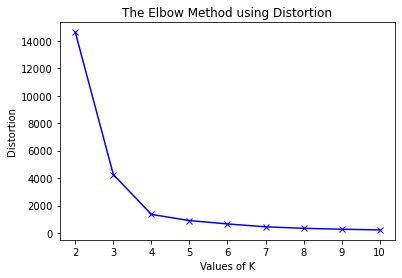

In [6]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

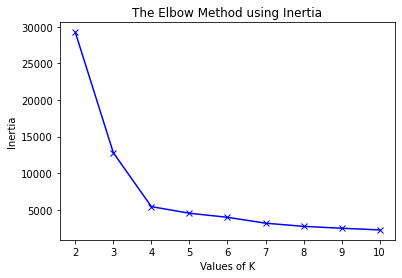

In [7]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

Centroids
[[-0.16253929 -0.1591925 ]
 [ 6.23521527  0.90589928]
 [-0.14397842  5.25821596]
 [ 6.0501022  12.84571429]]


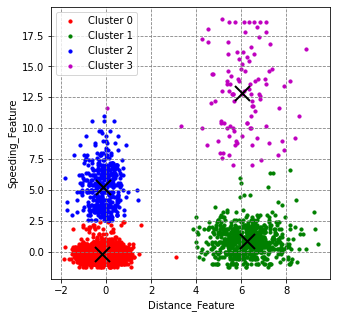

In [8]:
runClustering(4)

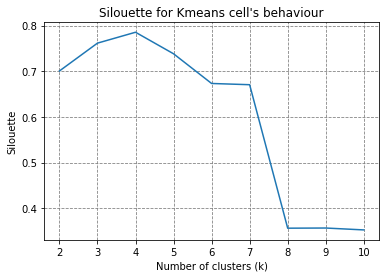

In [9]:
K = range(2,11)
KM = [KMeans(n_clusters=k).fit(X) for k in K]
labels = [k.labels_ for k in KM]

s = [silhouette_score(X, l, metric='euclidean') for l in labels]
plt.plot(K,s)
plt.grid(True)
plt.xlabel('Number of clusters (k)')
plt.ylabel("Silouette")
plt.title("Silouette for Kmeans cell's behaviour")
plt.show()

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
# instantiate Agglomerative Clustering instance
agglomerative = AgglomerativeClustering(n_clusters=4).fit(X)
print(agglomerative.labels_) #  labels of each sample

[1 1 1 ... 2 2 2]


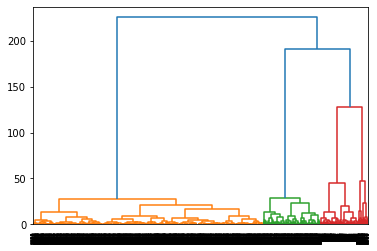

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(X, 'ward')
dn = dendrogram(Z)